In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#to read the datsets

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1V_tKI0Vtd50lzXt77sWLBbpMM2ZCC0hQ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('deliveries.csv')

file_id1 = '1HQsQxgXgY2KUGNbKv2ZGXPs_fjnvIZwY'
downloaded1 = drive.CreateFile({'id': file_id1})
downloaded1.GetContentFile('matches.csv')


In [ ]:
df = pd.read_csv('deliveries.csv')
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df2 = pd.read_csv('matches.csv')
df2.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [ ]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
# to find which stadiums are repeating with a slightly different name
l = sorted([i for i in df2['venue'].unique()])
print(l)

['ACA-VDCA Stadium', 'Barabati Stadium', 'Brabourne Stadium', 'Buffalo Park', 'De Beers Diamond Oval', 'Dr DY Patil Sports Academy', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Dubai International Cricket Stadium', 'Eden Gardens', 'Feroz Shah Kotla', 'Feroz Shah Kotla Ground', 'Green Park', 'Himachal Pradesh Cricket Association Stadium', 'Holkar Cricket Stadium', 'IS Bindra Stadium', 'JSCA International Stadium Complex', 'Kingsmead', 'M Chinnaswamy Stadium', 'M. A. Chidambaram Stadium', 'M. Chinnaswamy Stadium', 'MA Chidambaram Stadium, Chepauk', 'Maharashtra Cricket Association Stadium', 'Nehru Stadium', 'New Wanderers Stadium', 'Newlands', 'OUTsurance Oval', 'Punjab Cricket Association IS Bindra Stadium, Mohali', 'Punjab Cricket Association Stadium, Mohali', 'Rajiv Gandhi International Stadium, Uppal', 'Rajiv Gandhi Intl. Cricket Stadium', 'Sardar Patel Stadium, Motera', 'Saurashtra Cricket Association Stadium', 'Sawai Mansingh Stadium', 'Shaheed Veer Narayan Singh Intern

In [ ]:
# correcting stadium names
df2.replace('M. Chinnaswamy Stadium', 'M Chinnaswamy Stadium', inplace=True)
df2.replace('ACA-VDCA Stadium', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', inplace=True)
df2.replace('Feroz Shah Kotla Ground', 'Feroz Shah Kotla', inplace=True)
df2.replace('M. A. Chidambaram Stadium', 'MA Chidambaram Stadium, Chepauk', inplace=True)
df2.replace('IS Bindra Stadium', 'Punjab Cricket Association IS Bindra Stadium, Mohali', inplace=True)
df2.replace('Punjab Cricket Association Stadium, Mohali', 'Punjab Cricket Association IS Bindra Stadium, Mohali', inplace=True)
df2.replace('Rajiv Gandhi Intl. Cricket Stadium', 'Rajiv Gandhi International Stadium, Uppal', inplace=True)
df2.replace('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Dr YS Rajasekhara Reddy ACA VDCA Cricket Stadium', inplace=True)

In [ ]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [ ]:
df2.isnull().sum()
# the 4 NaN values in winner is because of No Result (due to rain)

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
df2[df2.result=='tie']
# checking number of tied matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
33,34,2017,Rajkot,2017-04-29,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,tie,0,Mumbai Indians,0,0,KH Pandya,Saurashtra Cricket Association Stadium,AK Chaudhary,CB Gaffaney,NaN
125,126,2009,Cape Town,2009-04-23,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,tie,0,Rajasthan Royals,0,0,YK Pathan,Newlands,MR Benson,M Erasmus,NaN
189,190,2010,Chennai,2010-03-21,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,tie,0,Kings XI Punjab,0,0,J Theron,"MA Chidambaram Stadium, Chepauk",K Hariharan,DJ Harper,NaN
387,388,2013,Hyderabad,2013-04-07,Royal Challengers Bangalore,Sunrisers Hyderabad,Royal Challengers Bangalore,bat,tie,0,Sunrisers Hyderabad,0,0,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",AK Chaudhary,S Ravi,NaN
400,401,2013,Bangalore,2013-04-16,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,tie,0,Royal Challengers Bangalore,0,0,V Kohli,M Chinnaswamy Stadium,M Erasmus,VA Kulkarni,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
705,11146,2019,Delhi,30/03/19,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,tie,0,Delhi Capitals,0,0,P Shaw,Feroz Shah Kotla,Anil Dandekar,Nitin Menon,Marais Erasmus
746,11342,2019,Mumbai,02/05/19,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,tie,0,Mumbai Indians,0,0,JJ Bumrah,Wankhede Stadium,S Ravi,O Nandan,Nanda Kishore


In [ ]:
abc= df[df['is_super_over']==1].groupby(by='match_id').count()
print(abc)
#number of superovers played (=7, but there were 9 tied matches)
#Further investigation has to be performed, we can see that match ID 11146 and 11342 have is_super_over=0 in inning=3 and 4

          inning  batting_team  ...  dismissal_kind  fielder
match_id                        ...                         
34            13            13  ...               2        2
126           11            11  ...               1        1
190            9             9  ...               3        2
388           13            13  ...               0        0
401           12            12  ...               2        1
476           12            12  ...               2        2
536           11            11  ...               4        0

[7 rows x 20 columns]


In [ ]:
df['inning'].unique()
#innings=5 is wrong

array([1, 2, 3, 4, 5])

In [ ]:
df[((df['inning']==3)|(df['inning']==4)|(df['inning']==5))].groupby(by='inning').count()
#there are 8 balls bowled with inning = 5, should be the ones that are missing with is_super_over=1

,match_id,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
inning,,,,,,,,,,,,,,,,,,,,
3,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,9,9,6
4,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,5,5,2
5,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,0,0,0


In [ ]:
for i in range(df.shape[0]):
  if df.iloc[i, 1]==3:
    df.iloc[i, 9]=1  # cleaning: inning=3, is_super_over is made as 1
  elif df.iloc[i,1]==5:
    df.iloc[i,1]=4  # cleaning: inning=5 is made 4

In [ ]:
sorted(list(df2.team1.unique()))

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

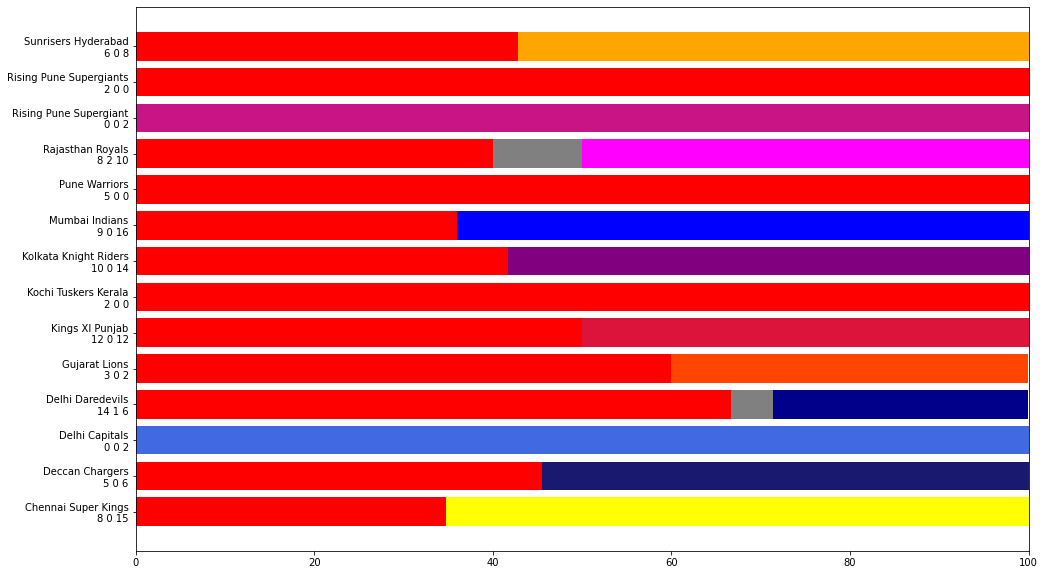

In [ ]:
#Visualization 1- Head to head analysis of teams
h2h = dict()
def add_to_h2h(team1, team2, winner):
  if team1 in h2h.keys():
    if team2 in h2h[team1]:
      if winner==team1:
        h2h[team1][team2][0]+=1
      elif winner==team2:
        h2h[team1][team2][2]+=1
      else:
        h2h[team1][team2][1]+=1
    else:
      if winner==team1:
        h2h[team1][team2]=[1,0,0]
      elif winner==team2:
        h2h[team1][team2]=[0,0,1]
      else:
        h2h[team1][team2]=[0,1,0]
  else:
    h2h[team1]=dict()
    if winner==team1:
      h2h[team1][team2]=[1,0,0]
    elif winner==team2:
      h2h[team1][team2]=[0,0,1]
    else:
       h2h[team1][team2]=[0,1,0]
for i in range(df2.shape[0]):
  if df2.iloc[i,10] is not None:
    add_to_h2h(df2.iloc[i, 4], df2.iloc[i, 5], df2.iloc[i, 10])
    add_to_h2h(df2.iloc[i, 5], df2.iloc[i, 4], df2.iloc[i, 10])
  else:
    add_to_h2h(df2.iloc[i, 4], df2.iloc[i, 5], df2.iloc[i, 10])

def head_to_head(team):
  plt.figure(figsize=(16,10))
  teams=sorted(list(df2.team1.unique()))
  color=['yellow','midnightblue','royalblue','darkblue','orangered','crimson','darkorange','purple','blue','dodgerblue','fuchsia','mediumvioletred','mediumvioletred','red','orange']
  for i in range(len(teams)):
    if teams[i]==team:
      team_color=color[i]
      break
  for team2, team2_color in zip(teams, color):
    if team2==team:
      continue
    if team2 not in h2h[team].keys():
      continue
    t1,nr,t2 = h2h[team][team2]
    t1_ = 100*t1/(t1+nr+t2)
    nr_ = 100*nr/(t1+nr+t2)
    t2_ = 100*t2/(t1+nr+t2)
    plt.barh([team2+'\n'+str(t1)+' '+str(nr)+' '+str(t2)], t1_, color=team_color, height=0.8)
    plt.barh([team2+'\n'+str(t1)+' '+str(nr)+' '+str(t2)], nr_, left=t1_, color='grey', height=0.8)
    plt.barh([team2+'\n'+str(t1)+' '+str(nr)+' '+str(t2)], t2_, left=(t1_+nr_), color=team2_color, height=0.8)
  plt.show()
head_to_head('Royal Challengers Bangalore')

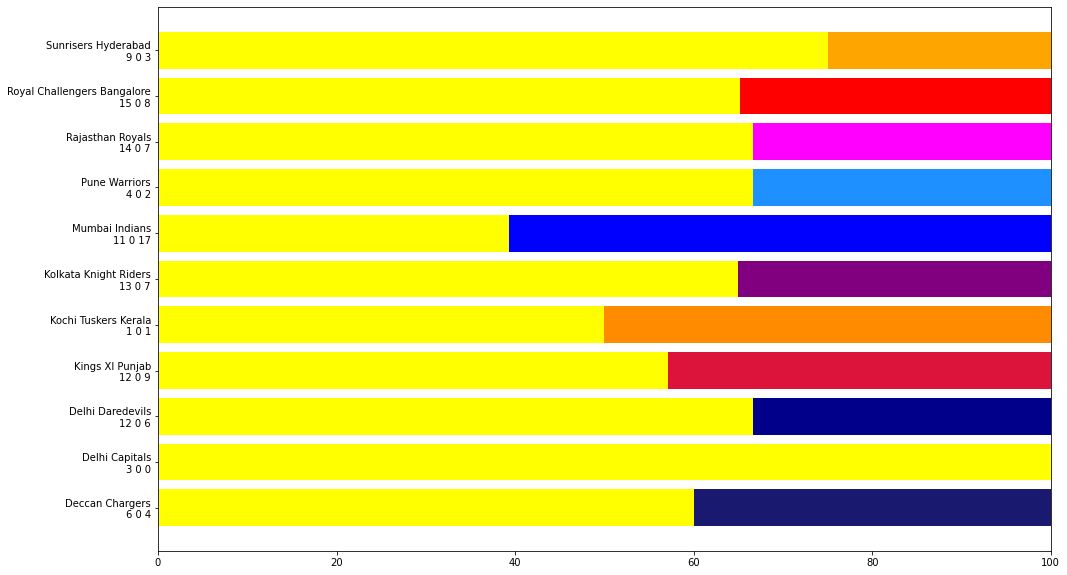

In [ ]:
head_to_head('Chennai Super Kings')

In [ ]:
#extras_team = dict()
def extras_team_year(df,df2,year):  
    df1 = pd.merge(df,df2,how='outer',left_on='match_id',right_on='id')
    return df1[df1['season']==i].groupby(by='bowling_team')[['wide_runs','bye_runs','legbye_runs','noball_runs','penalty_runs']].sum()
df1=extras_team_year(df,df2,'2017')
df1

,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs
bowling_team,,,,,


In [ ]:
#Analysis- Average wickets taken per team over the years
def get_wickets(df, team):
    match_id = 0
    opponents = None
    num_wickets = 0
    wickets = dict()
    for i in range(len(df)):
        if df['bowling_team'][i] == team:
            if match_id == 0:
                match_id = df['match_id'][i]
                opponents = df['batting_team'][i]
            if match_id == df['match_id'][i]:
                if type(df['player_dismissed'][i]) != float:
                    num_wickets += 1
            else:
                if opponents in wickets:
                    wickets[opponents] += [num_wickets]
                else:
                    wickets[opponents] = [num_wickets]
                opponents = df['batting_team'][i]
                match_id = df['match_id'][i]
                num_wickets = 0
                if type(df['player_dismissed'][i]) != float:
                    num_wickets += 1
    for i in wickets:
        wickets[i] = round(np.average(wickets[i]),0)
    return wickets
        
output = dict()
for i in df['batting_team'].unique():
    row = get_wickets(df, i)
    output[i] = row

final_out = pd.DataFrame(output, index = list(df['batting_team'].unique()))
final_out

,Sunrisers Hyderabad,Royal Challengers Bangalore,Mumbai Indians,Rising Pune Supergiant,Gujarat Lions,Kolkata Knight Riders,Kings XI Punjab,Delhi Daredevils,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors,Rising Pune Supergiants,Delhi Capitals
Sunrisers Hyderabad,NaN,5.0,6.0,6.0,2.0,6.0,5.0,4.0,6.0,6.0,NaN,NaN,7.0,8.0,7.0
Royal Challengers Bangalore,6.0,NaN,6.0,9.0,5.0,5.0,6.0,5.0,7.0,6.0,6.0,2.0,4.0,3.0,8.0
Mumbai Indians,6.0,6.0,NaN,8.0,8.0,5.0,6.0,7.0,6.0,6.0,6.0,2.0,6.0,5.0,7.0
Rising Pune Supergiant,6.0,6.0,5.0,NaN,6.0,6.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Lions,8.0,7.0,6.0,6.0,NaN,5.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Kolkata Knight Riders,6.0,6.0,6.0,6.0,4.0,NaN,5.0,6.0,6.0,6.0,5.0,8.0,5.0,5.0,8.0
Kings XI Punjab,7.0,6.0,6.0,7.0,6.0,6.0,NaN,6.0,6.0,7.0,6.0,4.0,5.0,4.0,8.0
Delhi Daredevils,5.0,6.0,6.0,6.0,4.0,6.0,6.0,NaN,6.0,5.0,5.0,6.0,5.0,6.0,NaN
Chennai Super Kings,4.0,6.0,6.0,NaN,NaN,4.0,5.0,6.0,NaN,5.0,6.0,4.0,5.0,NaN,4.0
Rajasthan Royals,6.0,6.0,6.0,NaN,NaN,6.0,6.0,6.0,7.0,NaN,6.0,6.0,4.0,NaN,8.0


In [ ]:
#Analysis- Average runs scored per team over the years
def get_runs(df, team):
    match_id = 0
    opponents = None
    runs = 0
    run_dict = dict()
    for i in range(len(df)):
        if df['batting_team'][i] == team:
            if match_id == 0:
                match_id = df['match_id'][i]
                opponents = df['bowling_team'][i]
            if match_id == df['match_id'][i]:
                if type(df['total_runs'][i]) != float:
                    runs += df['total_runs'][i]
            else:
                if opponents in run_dict:
                    run_dict[opponents] += [runs]
                else:
                    run_dict[opponents] = [runs]
                opponents = df['bowling_team'][i]
                match_id = df['match_id'][i]
                runs = 0
                if type(df['total_runs'][i]) != float:
                    runs += df['total_runs'][i]
    for i in run_dict:
        run_dict[i] = round(np.average(run_dict[i]),0)
    return run_dict

output = dict()
for i in df['batting_team'].unique():
    row = get_runs(df, i)
    output[i] = row

final_out = pd.DataFrame(output, index = list(df['batting_team'].unique()))
final_out

,Sunrisers Hyderabad,Royal Challengers Bangalore,Mumbai Indians,Rising Pune Supergiant,Gujarat Lions,Kolkata Knight Riders,Kings XI Punjab,Delhi Daredevils,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors,Rising Pune Supergiants,Delhi Capitals
Sunrisers Hyderabad,NaN,165.0,143.0,164.0,138.0,151.0,162.0,156.0,176.0,145.0,NaN,NaN,106.0,114.0,156.0
Royal Challengers Bangalore,179.0,NaN,168.0,159.0,154.0,165.0,156.0,163.0,155.0,138.0,158.0,143.0,156.0,182.0,178.0
Mumbai Indians,148.0,160.0,NaN,170.0,164.0,149.0,169.0,145.0,157.0,160.0,138.0,184.0,126.0,142.0,178.0
Rising Pune Supergiant,156.0,115.0,153.0,NaN,166.0,170.0,118.0,186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gujarat Lions,145.0,187.0,164.0,169.0,NaN,163.0,173.0,183.0,NaN,NaN,NaN,NaN,NaN,179.0,NaN
Kolkata Knight Riders,158.0,151.0,158.0,170.0,165.0,NaN,160.0,149.0,153.0,152.0,144.0,144.0,128.0,132.0,191.0
Kings XI Punjab,168.0,162.0,163.0,120.0,162.0,164.0,NaN,140.0,171.0,168.0,169.0,178.0,133.0,152.0,170.0
Delhi Daredevils,149.0,156.0,165.0,134.0,181.0,151.0,139.0,NaN,163.0,157.0,163.0,130.0,168.0,121.0,NaN
Chennai Super Kings,168.0,147.0,161.0,NaN,NaN,150.0,163.0,146.0,NaN,156.0,141.0,135.0,142.0,NaN,126.0
Rajasthan Royals,152.0,142.0,161.0,NaN,NaN,148.0,165.0,149.0,166.0,NaN,159.0,104.0,144.0,NaN,160.0


In [ ]:
# Toss Analysis- Win percentage on winning toss for each venue counted over groups, grouped by toss decision  
def toss_win(df, venue):
    match_count = field_count = field_winner_count = bat_count = bat_winner_count = 0
    for i in range(len(df)):
        if df['venue'][i] == venue:
            if df['toss_decision'][i] == 'field':
                field_count += 1
                if df['toss_winner'][i] == df['winner'][i]:
                    field_winner_count += 1
            if df['toss_decision'][i] == 'bat':
                bat_count += 1
                if df['toss_winner'][i] == df['winner'][i]:
                    bat_winner_count += 1
    try:
        field_winner_prob = round(field_winner_count/field_count, 2)
    except:
        field_winner_prob = np.nan
        
    try:
        bat_winner_prob = round(bat_winner_count/bat_count, 2)
    except:
        bat_winner_prob = np.nan
    return({'bat': bat_winner_prob, 'field' : field_winner_prob})

venues = dict()
for i in df2['venue'].unique():
    venues[i] = toss_win(df2, i)
pd.DataFrame(venues).T


,bat,field
"Rajiv Gandhi International Stadium, Uppal",0.21,0.42
Maharashtra Cricket Association Stadium,0.50,0.68
Saurashtra Cricket Association Stadium,0.00,0.57
Holkar Cricket Stadium,0.00,0.88
M Chinnaswamy Stadium,0.44,0.55
Wankhede Stadium,0.50,0.51
Eden Gardens,0.43,0.63
Feroz Shah Kotla,0.47,0.55
"Punjab Cricket Association IS Bindra Stadium, Mohali",0.35,0.54
Green Park,NaN,1.00


In [ ]:
df.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
batsmen = {}
match=1
for i in range(df.shape[0]):
  if df.iloc[i,6] in batsmen.keys():
    batsmen[df.iloc[i,6]]['Runs']+=df.iloc[i,15]
    
    if df.iloc[i,10]==0 and df.iloc[i,13]==0:
      batsmen[df.iloc[i,6]]['Balls']+=1
    else:
      if df.iloc[i,15]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
        batsmen[df.iloc[i,6]]['Balls']+=1
    if df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
      batsmen[df.iloc[i,6]]['Balls']+=2
    elif df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] == df.iloc[i+1,5]:
      batsmen[df.iloc[i,6]]['Balls']+=1
    
    if df.iloc[i,6]==df.iloc[i,18]:
      batsmen[df.iloc[i,6]]['Dismissals']+=1
      batsmen[df.iloc[i,6]][df.iloc[i,19]]+=1
    
    if df.iloc[i,0] != batsmen[df.iloc[i,6]]['Innings']:
      batsmen[df.iloc[i,6]]['Innings']+=1
      match=df.iloc[i,0]

  else:
    batsmen[df.iloc[i,6]]={'Runs':0, 'Balls':0, 'Dismissals':0, 'caught':0, 'bowled':0, 'run out':0, 'lbw':0, 'caught and bowled':0, 'stumped':0, 'retired hurt':0, 'hit wicket':0, 'obstructing the field':0, 'Innings':0}
    batsmen[df.iloc[i,6]]['Runs']+=df.iloc[i,15]
    
    if df.iloc[i,10]==0 and df.iloc[i,13]==0:
      batsmen[df.iloc[i,6]]['Balls']+=1
    else:
      if df.iloc[i,15]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
        batsmen[df.iloc[i,6]]['Balls']+=1
    if df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
      batsmen[df.iloc[i,6]]['Balls']+=2
    elif df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] == df.iloc[i+1,5]:
      batsmen[df.iloc[i,6]]['Balls']+=1
    
    if df.iloc[i,6]==df.iloc[i,18]:
      batsmen[df.iloc[i,6]]['Dismissals']+=1
      batsmen[df.iloc[i,6]][df.iloc[i,19]]+=1
    
    if batsmen[df.iloc[i,6]]['Innings'] != df.iloc[i,0]:
      batsmen[df.iloc[i,6]]['Innings']+=1
      match=df.iloc[i,0]

for name in batsmen.keys():
  batsmen[name]['Strike Rate']=(100 * batsmen[name]['Runs'] / batsmen[name]['Balls'])
  if batsmen[name]['Dismissals']>0:
    batsmen[name]['Average']=(batsmen[name]['Runs'] / batsmen[name]['Dismissals'])

batting_records = pd.DataFrame(batsmen)
batting_records = batting_records.T

In [ ]:
batting_records

,Runs,Balls,Dismissals,caught,bowled,run out,lbw,caught and bowled,stumped,retired hurt,hit wicket,obstructing the field,Innings,Strike Rate,Average
DA Warner,4741.0,3345.0,108.0,69.0,23.0,4.0,4.0,2.0,5.0,0.0,1.0,0.0,1132.0,141.733931,43.898148
S Dhawan,4632.0,3714.0,131.0,79.0,28.0,8.0,8.0,2.0,5.0,1.0,0.0,0.0,1407.0,124.717286,35.358779
MC Henriques,969.0,760.0,34.0,20.0,4.0,1.0,2.0,3.0,4.0,0.0,0.0,0.0,613.0,127.500000,28.500000
Yuvraj Singh,2765.0,2143.0,107.0,84.0,10.0,2.0,5.0,2.0,3.0,0.0,1.0,0.0,793.0,129.024732,25.841121
DJ Hooda,535.0,426.0,32.0,20.0,6.0,2.0,1.0,0.0,2.0,0.0,1.0,0.0,403.0,125.586854,16.718750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A Turner,4.0,11.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,36.363636,1.333333
H Brar,22.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,157.142857,NaN
S Rutherford,82.0,55.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,149.090909,16.400000
P Raj,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,NaN


In [ ]:
bowlers = {}
match = 1


<BarContainer object of 3 artists>

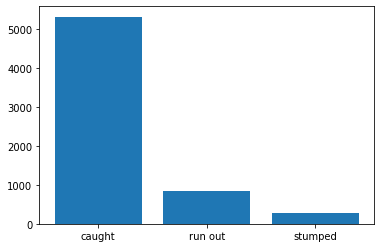

In [ ]:
kind=df.groupby('dismissal_kind').count()
t=dict(kind["fielder"][kind.fielder!=0])
plt.bar(t.keys(),t.values())

<BarContainer object of 10 artists>

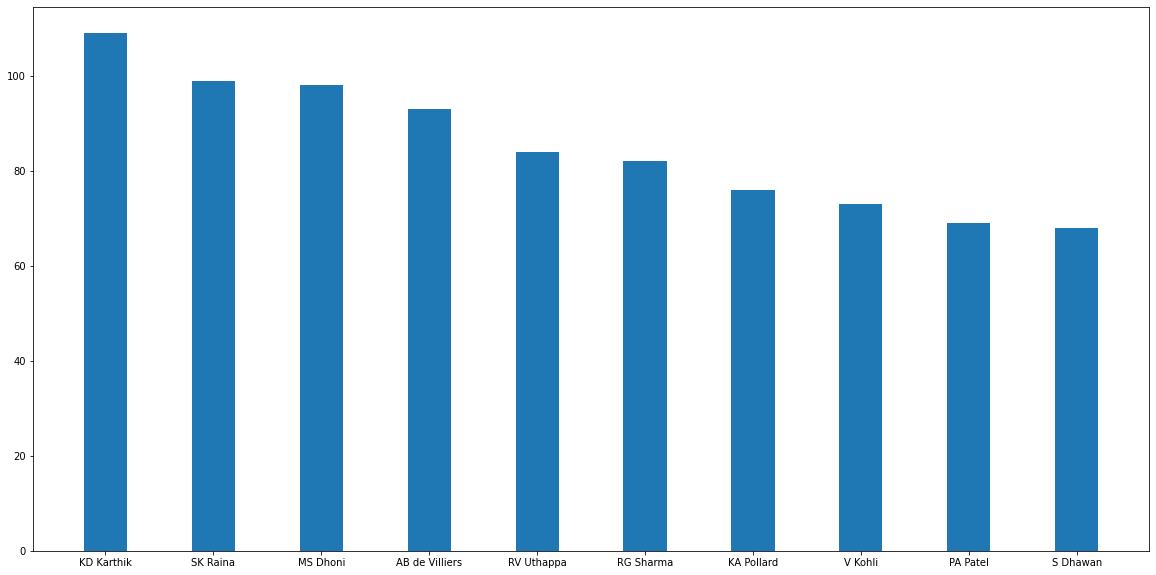

In [ ]:
catch=df[df.dismissal_kind=="caught"].groupby("fielder").count()
f=catch.sort_values(by=["match_id"],ascending=False).head(10)
f1=dict(f["match_id"])
plt.figure(figsize=(20,10))
plt.bar(f1.keys(),f1.values(),width=0.4)

<BarContainer object of 10 artists>

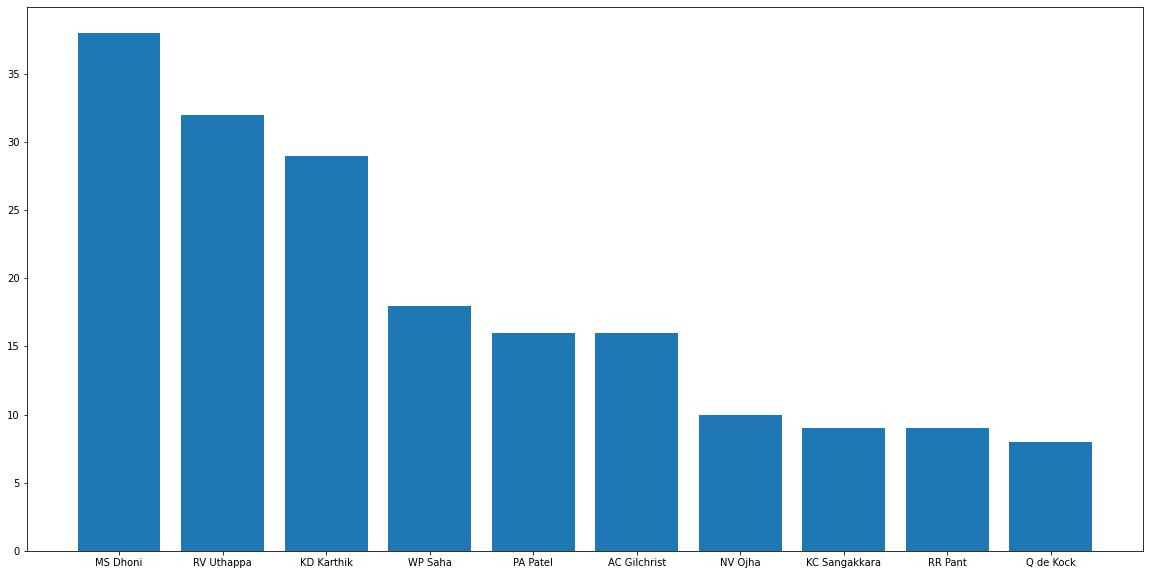

In [ ]:
stump=df[df.dismissal_kind=="stumped"].groupby("fielder").count()
s=stump.sort_values(by=["match_id"],ascending=False).head(10)
s1=dict(s["match_id"])
plt.figure(figsize=(20,10))
plt.bar(s1.keys(),s1.values())

In [ ]:
bowler = {}
match=1
for i in range(df.shape[0]):
  if df.iloc[i,8] in bowler.keys():
    bowler[df.iloc[i,8]]['Runs']+=(df.iloc[i,15]+df.iloc[i,10]+df.iloc[i,13])
    bowler[df.iloc[i,8]]['Wides']+=df.iloc[i,10]
    bowler[df.iloc[i,8]]['No balls']+=df.iloc[i,13]
        
    if df.iloc[i,10]==0 and df.iloc[i,13]==0:
      bowler[df.iloc[i,8]]['Balls']+=1
    else:
      if df.iloc[i,15]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
        bowler[df.iloc[i,8]]['Balls']+=1
    if df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
      bowler[df.iloc[i,8]]['Balls']+=2
    elif df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] == df.iloc[i+1,5]:
      bowler[df.iloc[i,8]]['Balls']+=1
    
    if df.iloc[i,19] in ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']:
      bowler[df.iloc[i,8]]['Wickets']+=1
      bowler[df.iloc[i,8]][df.iloc[i,19]]+=1
    
    if df.iloc[i,0] != bowler[df.iloc[i,8]]['Innings']:
      bowler[df.iloc[i,8]]['Innings']+=1
      match=df.iloc[i,0]

  else:
    bowler[df.iloc[i,8]]={'Runs':0, 'Balls':0, 'Wickets':0, 'Wides':0, 'No balls':0, 'caught':0, 'bowled':0, 'lbw':0, 'caught and bowled':0, 'stumped':0, 'hit wicket':0, 'Innings':0}
    bowler[df.iloc[i,8]]['Runs']+=(df.iloc[i,15]+df.iloc[i,10]+df.iloc[i,13])
    bowler[df.iloc[i,8]]['Wides']+=df.iloc[i,10]
    bowler[df.iloc[i,8]]['No balls']+=df.iloc[i,13]
    
    if df.iloc[i,10]==0 and df.iloc[i,13]==0:
      bowler[df.iloc[i,8]]['Balls']+=1
    else:
      if df.iloc[i,15]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
        bowler[df.iloc[i,8]]['Balls']+=1
    if df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] != df.iloc[i+1,5]:
      bowler[df.iloc[i,8]]['Balls']+=2
    elif df.iloc[i,13]>0 and i+1<df.shape[0] and df.iloc[i,5] == df.iloc[i+1,5]:
      bowler[df.iloc[i,8]]['Balls']+=1
    
    if df.iloc[i,19] in ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']:
      bowler[df.iloc[i,8]]['Wickets']+=1
      bowler[df.iloc[i,8]][df.iloc[i,19]]+=1
    
    if bowler[df.iloc[i,8]]['Innings'] != df.iloc[i,0]:
      bowler[df.iloc[i,8]]['Innings']+=1
      match=df.iloc[i,0]

for name in bowler.keys():
  bowler[name]['Economy']=(6 * bowler[name]['Runs'] / bowler[name]['Balls'])
  if bowler[name]['Wickets']>0:
    bowler[name]['Strike Rate']=(bowler[name]['Balls'] / bowler[name]['Wickets'])
    bowler[name]['Average']=(bowler[name]['Runs'] / bowler[name]['Wickets'])
  

bowling_records = pd.DataFrame(bowler)
bowling_records = bowling_records.T

In [ ]:
bowling_records

,Runs,Balls,Wickets,Wides,No balls,caught,bowled,lbw,caught and bowled,stumped,hit wicket,Innings,Economy,Strike Rate,Average
TS Mills,153.0,107.0,5.0,9.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,27.0,8.579439,21.400000,30.600000
A Choudhary,144.0,103.0,5.0,6.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,45.0,8.388350,20.600000,28.800000
YS Chahal,2366.0,1827.0,100.0,60.0,6.0,63.0,19.0,5.0,1.0,12.0,0.0,1258.0,7.770115,18.270000,23.660000
S Aravind,1039.0,762.0,45.0,31.0,1.0,32.0,8.0,2.0,3.0,0.0,0.0,617.0,8.181102,16.933333,23.088889
SR Watson,2691.0,2069.0,92.0,98.0,13.0,71.0,16.0,2.0,2.0,1.0,0.0,812.0,7.803770,22.489130,29.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H Brar,48.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,9.600000,NaN,NaN
P Raj,60.0,33.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,33.0,10.909091,33.000000,60.000000
O Thomas,88.0,67.0,5.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,63.0,7.880597,13.400000,17.600000
A Roy,14.0,15.0,1.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0,5.600000,15.000000,14.000000


<BarContainer object of 10 artists>

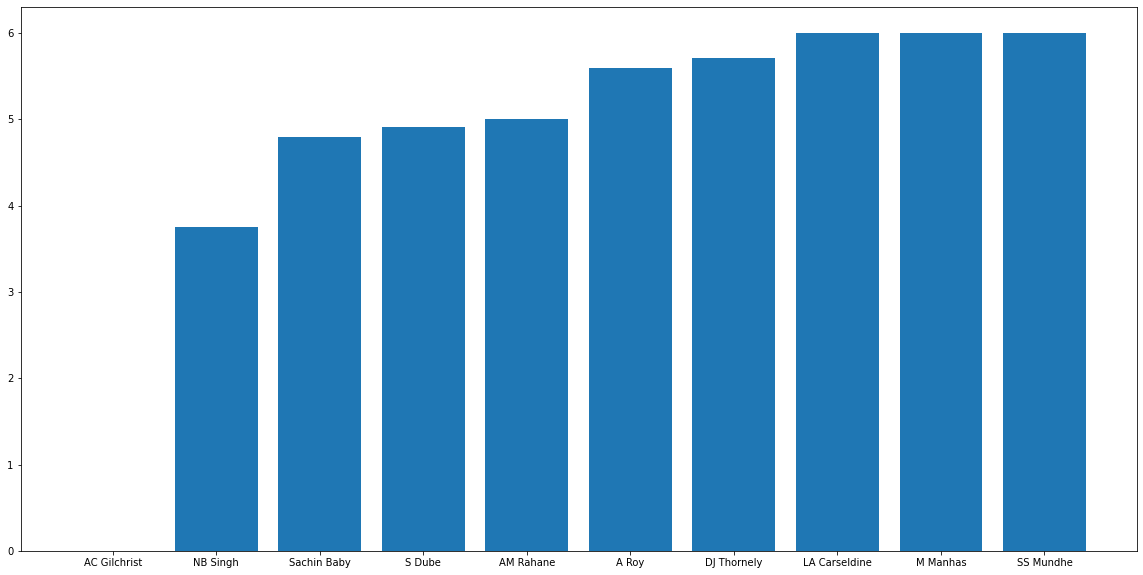

In [ ]:
economy=bowling_records.sort_values(by=["Economy"]).head(10)
s1=dict(economy.Economy)
plt.figure(figsize=(20,10))
plt.bar(s1.keys(),s1.values())

<BarContainer object of 10 artists>

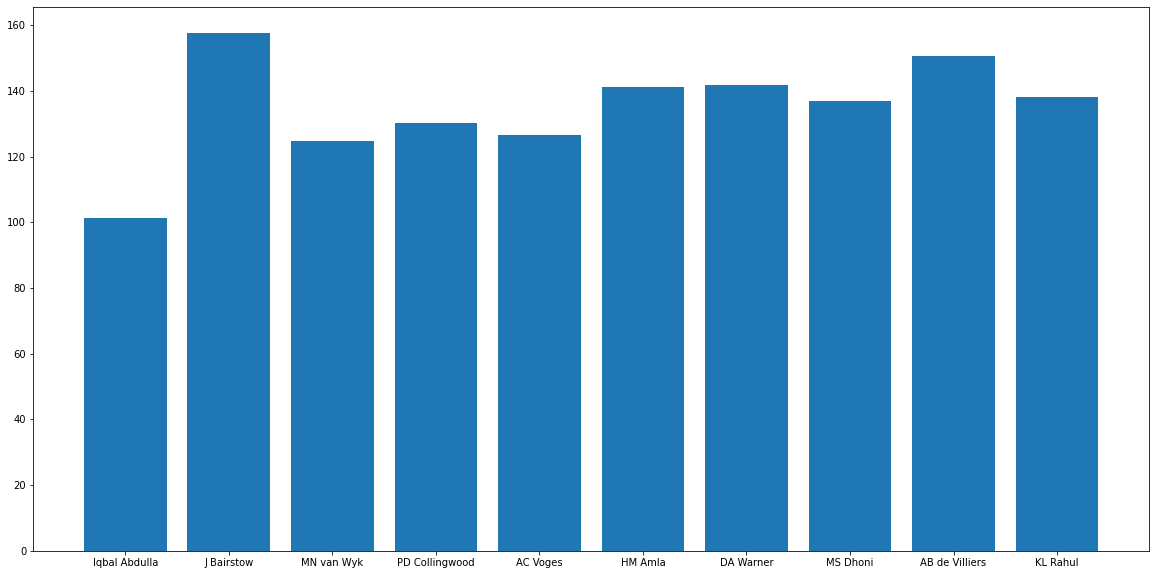

In [ ]:
strike_rate=batting_records.sort_values(by=['Strike Rate'], ascending=False).head(10)
s2=dict(avg['Strike Rate'])
plt.figure(figsize=(20,10))
plt.bar(s2.keys(),s2.values())